# Sınıflandırma Problemleri

Hedeflenen değişken bir kategorik değişken olacak ve amacımız yine benzer bir şekilde örneğin yeni bir gözlem birimi geldiğinde bağımsız bir değişken değerleri gözlemlendiğinde kategorik değişkenin 1 ya da 0 sınıfının gerçekleşme olasılığı ile ilgileneceğiz.

In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from warnings import filterwarnings
filterwarnings('ignore')

## Lojistik Regresyon (Logistic Regression)

**Amaç**,sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır.Bağımlı değişkenimiz kategoriktir.Kategorik bir yanıt değişkenin tahmin edilmesine sınıflandırma problemi denmiş olur.Amacımız henüz gözlenmemiş bir X değer seti geldiğinde bunun sonucunda oluşacak sınıfı ortaya çıkarmaktır.Genellikle X'in her bir kategoriye ait olma olasılıkları ile ilgilenir.

Sınıf tahminlerinin iyiliği, yanlış sınıflandırma oranı ya da doğru sınıflandırma oranı ile ölçülür.

 * Bağımlı değişken kategoriktir.
 * Adını bağımlı değişkene uygulanan logit dönüşümünden alır.
 * Doğrusal regresyonda aranan varsayımlar burada aranmadığı için daha esnek kullanılabilirliği vardır.
 * Bağımlı değişkenin 1 olarak tanımlanan değerinin gerçekleşme olasılığı hesaplanır.Dolayısıyla bağımlı değişkenin alacağı değer ile ilgilenilmez.
 * Logistik fonksiyonu sayesinde üretilen değerler 0-1 arasında olur.

#### Model

Veri seti bir hasta geldiğinde onun şeker hastası olup olmadığını tahmin edebilecek bir makine öğrenmesi modeli geliştirilebilir mi ? Buna yönelik olarak veri setinde örneğin ; daha önce geçirilen hamilelik sayısı,kan basıncı,vücut kitle endeksi,insülin ve yaş gibi bazı değişkenler vardır.Buradaki **Outcome** değişkeni çıktı/hedef/bağımlı değişkenimizdir.

In [5]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


Buradaki **Outcome** değişkenimiz bir kategorik değişken olarak görünmese de 0-1 şeklinde evet-hayır ifade eden bir yapıdadır.

In [11]:
# Bağımlı değişken içindeki şeker hastası olanlar(1) ve olmayanlar(0)
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

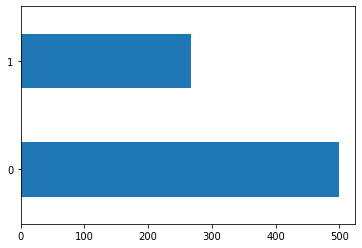

In [12]:
# Görsel gösterimi
df["Outcome"].value_counts().plot.barh();

In [13]:
# Veri setti içerisinde ki sürekli değişkenlerin betimsel istatistikleri
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [14]:
# Değişkenlerimizi Oluşturma
y = df["Outcome"]  # bağımlı değişken
X = df.drop(["Outcome"], axis = 1)  # bağımlı değikeni dışarıda bırakarak geri kalan sürekli değişkenleri aldık

In [15]:
# Stats-Model ile Model Kurma
loj = sm.Logit(y, X)
loj_model = loj.fit()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


In [16]:
loj_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:                 0.05922
Time:                        14:05:23   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [18]:
# Scikit-Learn ile Model Kurma
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver="liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# Sabit Katsayı
loj_model.intercept_

array([-5.85143231])

In [22]:
# Bütün bağımsız değişkenlerin katsayısı
loj_model.coef_

array([[ 1.16963683e-01,  2.82797772e-02, -1.69496404e-02,
         7.62955369e-04, -6.33114442e-04,  5.93176655e-02,
         6.70241372e-01,  7.12009920e-03]])

#### Tahmin - Model Tuning

In [23]:
y_pred = loj_model.predict(X)

In [24]:
# Karmaşıklık Matrisi
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [25]:
# Doğruluk puanı --> Doğru yapılan işler / Tüm işler 
accuracy_score(y, y_pred)

0.7747395833333334

In [37]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [28]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [29]:
# 0-1 olarak değil olasılık oranı ile tahmin değerlerini gösterme --> sol taraf(0) sağ taraf(1)
loj_model.predict_proba(X)[0:10]

array([[0.35173854, 0.64826146],
       [0.91632343, 0.08367657],
       [0.22529941, 0.77470059],
       [0.92055638, 0.07944362],
       [0.16933907, 0.83066093],
       [0.79795784, 0.20204216],
       [0.87903358, 0.12096642],
       [0.27676054, 0.72323946],
       [0.32079071, 0.67920929],
       [0.92186314, 0.07813686]])

Şimdi tahmin değelerinden kendimize göre bir eşik değeri belirterek bu değerin altı ve üstündeki değerlerin 0 ya da 1 olmasını söyleyeceğiz.

In [31]:
# Tahmin edilen değerler içerisinden 1 olan sütunu alma
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [33]:
# Doğruluğunu kontrol etme
y_probs[0:10]

array([0.64826146, 0.08367657, 0.77470059, 0.07944362, 0.83066093,
       0.20204216, 0.12096642, 0.72323946, 0.67920929, 0.07813686])

In [35]:
# 0.5 eşik değeri belirterek üstündeki değerleri 1 altındaki değerleri 0 yap 
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [36]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

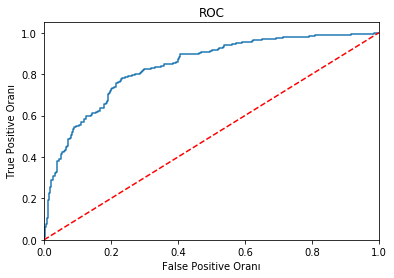

In [38]:
# ROC Eğrisi
from sklearn.metrics import roc_auc_score,roc_curve

logit_roc_auc = roc_auc_score(y, loj_model.predict(X))  # auc skoru hesaplayacak fonksyion(gerçek değerler ve tahmin edilen değerler)

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])  # ilgilendiğimiz kısım olan 1 durumu
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

Mavi çizgi modelimizin başarısını hesaplamak için kullanacağımzı eğri.Kırmızı çizgi ise hiçbir modelleme çalışması yapsaydık dahi elde edeceğimiz başarıyı ifade etmektedir.Rastgele bütün değerleri 1 ya da 0 değerlerini atasatdık bu çizgi ortaya çıkacaktır.Bu çizgiden ne farkım var sorusuna mümkün olduğu kadar bu çizgiden uzaklaşarak cevap vermeye çalışıyoruz.AUC (Area Under Curve)

Şimdi ise modelimizi test-train olarak ayırarak bir Cross-Validation yöntemi ile hata elde edeceğiz.

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,

                                                    random_state = 42)
# Model Kurma
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Doğruluk Skoru
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

**Cross-Validation Skoru**
 * 1.argüman lojistik model, 
 * 2.argüman model içerisine yerleştirilmek istenen bağımsız değişken seti
 * 3.argüman tahmin edilen y değerleri
 * 4.argüman cross validation

In [13]:
# Modeli en doğru skoru
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.7704710144927536

## Gauissian Naive Bayes

**Tanım:**Olasılık temelli bir modelleme tekniğidir.Amaç belirli bir örneğin her sınıfa ait olma olasılığının koşullu olasılık temelli hesaplanmasıdır.Örneğin bir kredi başvurusu yapmak isteyen kişinin daha önceki bilinen veriler üzerinde kredi borcunu ödeyip ödeyememe durumu örnek olarak verilebilir.

#### Model ve Tahmin

In [4]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [5]:
from sklearn.naive_bayes import GaussianNB

In [70]:
# Model Kurma
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model              

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
# Tahmin edilen y değerleri
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [14]:
# Tahmin olasılık oranları
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [15]:
# Test Hatası
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [16]:
# Doğrulanmış Test Skoru
cross_val_score(nb_model, X_test, y_test, cv=10).mean()

0.775

**Dışsal bir paremetresi olmadığından dolayı Model Tuning yapma işlemi söz konusu değildir.**

## K-En Yakın Komşu (KNN)

Tahminler gözlem benzerliği göre yapılır.

**Bana arkadaşını söyle sana kim olduğunu söyleyeyim.**

 **KNN Basamakları**
 * Komşu sayısını belirle
 * Bilinmeyen nokta ile diğer tüm noktolar arasındaki uzaklıkları hesapla
 * Uzaklıkları sırala ve belirlenen k sayısına göre en yakın olna k gözlemi seç
 * Sınıflandımra ise en sık sınıf, regresyon ise ortalama değeri tahmin olarak verir.

#### Model ve Tahmin

In [17]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [18]:
# Model Kurma
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
# Tahmin
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6883116883116883

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



#### Model Tuning

In [22]:
# Parametre 
knn_params = {"n_neighbors": np.arange(1,50)}

In [23]:
# Cross-Valide ederek Model Kurma
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
# Modelin en iyi değerleri
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.7486033519553073
En iyi parametreler: {'n_neighbors': 11}


In [71]:
# Final Modeli
knn = KNeighborsClassifier(n_neighbors = 11)
knn_tuned = knn.fit(X_train, y_train)

In [26]:
# Tuned edilmiş skor değeri
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7316017316017316

In [27]:
# Başka bir fonksiyon ile accuracy değerine ulaşma
knn_tuned.score(X_test, y_test)

0.7316017316017316

## Destek Vektör Makineleri

### SVC (Support Vector Classification)

**Amaç**, iki sınıf arasındaki ayrımın optimum olmasını sağlayacak hiper-düzlemi bulmaktır.

#### Model ve Tahmin

In [29]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                     random_state=42)

In [30]:
# Model Kurma
from sklearn.svm import SVC
svm_model = SVC(kernel = "linear")
svm_model.fit(X_train, y_train)
svm_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
# Test Hatası
y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

#### Model Tuning

Bu kısımda tuned edilmesi gereken hiperparametre değeri **C**'dir.Bize oluşturulacak olan doğrunun/ayrımın oluşması ile ilgili bir kontrol etme imkanı sağlayan bir parametredir.

In [32]:
# Hiperparametre
svc_params = {"C":np.arange(1,10)}

In [33]:
svc = SVC(kernel = "linear")
svc_cv_model = GridSearchCV(svc, svc_params, cv =10, 
                            n_jobs = -1, 
                            verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 20.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [34]:
# En iyi parametre
svc_cv_model.best_params_

{'C': 5}

In [73]:
# Final Modeli
svc = SVC(kernel = "linear", C = 5)
svc_tuned = svc.fit(X_train, y_train)

In [36]:
# Tuned edilmiş modelin test hatası skoru
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

### SVC RBF (Doğrusal Olmayan)

#### Model ve Tahmin

In [37]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                     random_state=42)

In [38]:
# Model Kurma
from sklearn.svm import SVC
svc_model = SVC(kernel = "rbf")
svc_model.fit(X_train, y_train)
svc_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [39]:
# Test Hatası
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6536796536796536

#### Model Tuning

In [40]:
svc_params = {"C":[0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
              "gamma":[0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]}

In [41]:
svc = SVC(kernel = "rbf")
svc_cv_model = GridSearchCV(svc,
                            svc_params,
                            cv=10,
                            n_jobs =-1,
                            verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 471 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   19.2s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [42]:
# En iyi Hiperparametre Değerleri
svc_cv_model.best_params_

{'C': 10, 'gamma': 0.0001}

In [74]:
# Final Modeli
svc = SVC(kernel = "rbf", C=10, gamma =0.0001 )
svc_tuned = svc.fit(X_train, y_train)

In [45]:
# Test Hatası Skoru
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Yapay Sinir Ağları(YSA) -- Artificial Neural Networks

İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir.

#### Model ve Tahmin

In [128]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                     random_state=42)

Standartlaştırma işlemi gerçekleştireceğiz.Yapay sinir ağlarınının değişkenlerin ölçeklerine ve bunların bir birbirleri aralarındaki durumdan etkilendiğini ifade etmiştik ve bu durumdan dolayı bu işlemi yapacağız.

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
scaler = StandardScaler()

In [131]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
# Model Kurma
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()
mlpc.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [133]:
# Test Hatası Skoru
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7272727272727273

#### Model Tuning

In [134]:
# Hiperparametre
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [55]:
# Model Kurma
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 19.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
               

In [56]:
# En iyi parametreler
mlpc_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.02,
 'hidden_layer_sizes': (100, 100, 100),
 'solver': 'sgd'}

In [150]:
# Final Modeli
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.02, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "sgd")

mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [151]:
# Test Hatası Skoru
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7316017316017316

## CART (Sınıflandırma Ağaçları) -- Classification and Regression Trees

**Amaç** veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

Örneğin; bir boy değeri değişkeni üzerinden evet-hayır alt sınıfına eğer evet ise erkek, hayır ise daha sonra da bir kilo değeri değişkeni üzerinden bu hayır bir evet-hayır bir alt gruba daha indirgemek ve sonuç olarak erke ya da kadın olarak belirtmek.

#### Model ve Tahmin

In [103]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [99]:
# Model Kurma
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
cart_model= cart.fit(X_train, y_train)

In [63]:
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [65]:
# Karar Kuralı
!pip install skompiler

  Created wheel for skompiler: filename=SKompiler-0.5.5-cp37-none-any.whl size=57153 sha256=97d6ec6cc1074f1c1d087c2ac3f29ff182660fc516e10fd3e38693aa2e8ab1cd
  Stored in directory: C:\Users\lenovo\AppData\Local\pip\Cache\wheels\21\eb\99\6e32f89da503a823f6bc1a985abfdaeaa01b3a6b5ac5776d15
Successfully built skompiler


In [67]:
!pip install astor

In [100]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 0 if x[6] <= 0.39149999618530273 else 1) if x[5] <=
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[1] <= 138.0 else 0) if x[5] <= 
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (0 if x[1] <= 133.0 else (0 if x[2] <= 66.5 else 1) if x[2] <= 73.0 else
    0) if x[2] <= 94.0 else 1 if x[0] <= 9.0 else 0) if x[5] <= 
    26.949999809265137 else (1 if x

Veri setini sadece iki değişkene ve maksimum arama derinliğini 2 yaparak da az karmaşık bir yapı üzerinden (hamilelik durumununa göre diyabet olma ihtimali) gözlemleme yapabiliriz.

In [92]:
# Kaç hamilelik geçirdiği sayısını girerek diyabet olma ihtimaline bakıyoruz.
x = [4]

In [93]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

0

In [104]:
# Test Hatası SKoru
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7012987012987013

#### Model Tuning

In [105]:
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [106]:
?cart_model

Type:        DecisionTreeClassifier
String form:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
           <...> ight_fraction_leaf=0.0, presort=False,
           random_state=None, splitter='best')
File:        c:\users\lenovo\anaconda3\lib\site-packages\sklearn\tree\tree.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : string, optional (default="gini")
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : string, optional (default="best")
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain les

In [107]:
# Hiperparametre
cart_params = {"max_depth": list(range(1,10)),
            "min_samples_split" : list(range(2,50)) }

In [109]:
# Model Kurma
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_params, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 2626 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   25.1s finished


In [110]:
# En iyi parametreler
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [76]:
# Final Modeli
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [112]:
# Test Hatası Skoru
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## Random Forests (RF)

Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

 * Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntemi ile değişkenler random subspace yöntemi ile seçilir.
 * Karar ağacının her bir düğümünde en iyi dallara ayırıcı değişken tüm değişkenler arasından rastgele seçilen az sayıdaki değişken arasından seçilir.
 * Ağaç oluşturmada veri setinin 2/3'ü kullanılır.Dışarıda kalan veri ağaçların performasn değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır.
 * Her düğüm noktasında rastgele değişken seçimimi yapılır.(regresyonda p/3,sınıflama'da karekök p)
 * Nihai tahmin için ağaçlardan tahmin değerleri talep edilirken her bir ağacın daha önce hesaplanan hata oranları göz önüne alınarak ağaçlara ağırlık verlilir.

#### Model ve Tahmin

In [6]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [7]:
# Model Kurma
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

In [8]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
# Test Hatası Skoru
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7186147186147186

#### Model Tuning

**Random Forest**'ın en önemli iki parametresi vardır. Bunlarda bir tanesi **kullanılacak olan ağaç sayısı(n_estimators)**, diğeri ise **bölünmelerde göz önünde bulundurulacak olan değişken sayısı(max_feauture)**'dır.

In [13]:
# Hiperparametre
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [15]:
# Model Kurma
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2)

rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  9.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [16]:
# En iyi parametreler
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 500}


In [77]:
# Final Modeli
rf_tuned = RandomForestClassifier(max_depth = 10,
                                  max_features = 5,
                                  min_samples_split = 2,
                                  n_estimators = 500)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
# Test Hatası Skoru
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

In [19]:
# Değişkenleri Önem Düzeyi
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

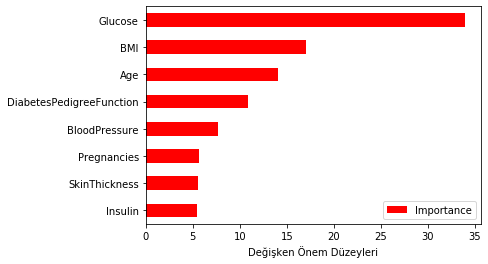

In [21]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri");

## Gradient Boosting Machines (GBM)

AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur. 

Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.

Adaptive Boosting --Örnek : Kutu içindeki noktaların doğru şekillerde bölünerek farklı olanların hepsinin tek bir sınıf içinde toplanması.

 * Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.
 * Seri içersindeki bir model serideki bir önceki modelin tahmi nartıklarının/hatalarının üzerinde kurularak(fit)o oluşturulur.

#### Model ve Tahmin

In [22]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [23]:
# Model Kurma
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm_model = gbm.fit(X_train, y_train)

In [24]:
# Test Hatası Skoru
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

#### Model Tuning

In [25]:
gbm_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [26]:
# Hiperparametre
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [27]:
# Model Kurma
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  7.2min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...=None,
                                                  presort='aut

In [28]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 500}


In [78]:
# Final Modeli
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 500)

gbm_tuned =  gbm.fit(X_train,y_train)

In [31]:
# Test Hatası Skoru
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## XGBoost (eXtreme Gradiant Boosting)

**XGBoost**, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş;ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.

#### Model ve Tahmin

In [33]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [34]:
# Model Kurma
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_model = xgb.fit(X_train, y_train)

[11:48:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [35]:
# Test Hatası Skoru
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

#### Model Tuning

In [36]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [37]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_byno <...> tree_method='exact', use_label_encoder=True,
           validate_parameters=1, verbosity=None)
File:        c:\users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.
    use_label_encoder : bool
        (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new code,
        we recommend that you set this parameter to False.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objectiv

In [38]:
# Hiperparametre
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [ ]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)
xgb_cv_model.fit(X_train, y_train)

In [ ]:
# En İyi Parametreler
xgb_cv_model.best_params_

In [79]:
# Final Modeli
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

xgb_tuned =  xgb.fit(X_train,y_train)

[13:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [52]:
#Test Hatası Skoru
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## LightGBM

**LightGBm**,XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.

#### Model ve Tahmin

In [43]:
!pip install lightgbm

In [44]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [45]:
# Model Kurma
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(X_train, y_train)

In [46]:
# Test Hatası Skoru
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

#### Model Tuning

In [47]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [48]:
# Hiperparametre
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [ ]:
# Model Kurma
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

lgbm_cv_model.fit(X_train, y_train)

In [ ]:
# En iyi parametreler
lgbm_cv_model.best_params_

In [80]:
# Final Modeli
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

lgbm_tuned = lgbm.fit(X_train,y_train)

In [51]:
# Test Hatası Skoru
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## CatBoost (Category Boosting)

Kategorik değişkenler ile otomatatik olarak mücadele edebilen,hızlı ve başarılı bir diğer GBM türevidir.

Yandedex 2017

Kategorik değişken desteği -- Veri setimizde çok fazla değişken olduğunda ve bu değişkenler arasında kategorik değişkenler sayısı fazlalaştığında bölünme işlemlerinde bazı problemler ortaya çıkmaktadır.İşte bu kategorik değişkenlerin hem bölünme anlamında hem sınıflarının etki düzeyi anlamında etkileri aynı olmayacaktır.

#### Model ve Tahmin

In [53]:
!pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=76a6c005a90d95e0ffb19341053e48c9f273f5c80f1e708f9f7abacdbd9b3cbe
  Stored in directory: C:\Users\lenovo\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [54]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [55]:
# Model Kurma
from catboost import CatBoostClassifier
catb = CatBoostClassifier()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879822	total: 155ms	remaining: 2m 34s
1:	learn: 0.6843544	total: 159ms	remaining: 1m 19s
2:	learn: 0.6805937	total: 164ms	remaining: 54.4s
3:	learn: 0.6766011	total: 169ms	remaining: 42.2s
4:	learn: 0.6721103	total: 174ms	remaining: 34.7s
5:	learn: 0.6681927	total: 179ms	remaining: 29.7s
6:	learn: 0.6642263	total: 184ms	remaining: 26.1s
7:	learn: 0.6603263	total: 189ms	remaining: 23.4s
8:	learn: 0.6563030	total: 194ms	remaining: 21.3s
9:	learn: 0.6528911	total: 198ms	remaining: 19.6s
10:	learn: 0.6488276	total: 203ms	remaining: 18.3s
11:	learn: 0.6455457	total: 209ms	remaining: 17.2s
12:	learn: 0.6419444	total: 216ms	remaining: 16.4s
13:	learn: 0.6374939	total: 227ms	remaining: 16s
14:	learn: 0.6340194	total: 238ms	remaining: 15.6s
15:	learn: 0.6304776	total: 242ms	remaining: 14.9s
16:	learn: 0.6267531	total: 248ms	remaining: 14.3s
17:	learn: 0.6238199	total: 252ms	remaining: 13.7s
18:	learn: 0.6204938	total: 256ms	remaining: 13.2s
19:	learn: 0.

In [58]:
# Test Hatası Skoru
y_pred = catb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

#### Model Tuning

In [62]:
# Hiperparametre
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [ ]:
# Model Kurma
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)

In [ ]:
# En iyi parametreler
catb_model.best_params_

In [81]:
# Final Modeli
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6616627	total: 12.6ms	remaining: 2.52s
1:	learn: 0.6400771	total: 15.9ms	remaining: 1.57s
2:	learn: 0.6218613	total: 19.6ms	remaining: 1.29s
3:	learn: 0.6091958	total: 22.8ms	remaining: 1.12s
4:	learn: 0.5938260	total: 26.9ms	remaining: 1.05s
5:	learn: 0.5777363	total: 30.2ms	remaining: 977ms
6:	learn: 0.5641154	total: 34.6ms	remaining: 954ms
7:	learn: 0.5465291	total: 37.9ms	remaining: 910ms
8:	learn: 0.5343176	total: 41.6ms	remaining: 883ms
9:	learn: 0.5253371	total: 45.5ms	remaining: 864ms
10:	learn: 0.5152429	total: 48.6ms	remaining: 835ms
11:	learn: 0.5039035	total: 52.3ms	remaining: 820ms
12:	learn: 0.4940833	total: 56ms	remaining: 806ms
13:	learn: 0.4869167	total: 59.2ms	remaining: 786ms
14:	learn: 0.4800142	total: 62.8ms	remaining: 775ms
15:	learn: 0.4744378	total: 66.3ms	remaining: 762ms
16:	learn: 0.4684316	total: 69.5ms	remaining: 748ms
17:	learn: 0.4619170	total: 73ms	remaining: 738ms
18:	learn: 0.4560716	total: 76.5ms	remaining: 728ms
19:	learn: 0.4520436	total

In [64]:
# Test Hatası Skoru
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Tüm Modellerin Karşılaştırılması

In [162]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]

for model in modeller:
    
    if(model == mlpc_tuned):
        
        isimler = model.__class__.__name__
        y_pred = model.predict(X_test_scaled)
        dogruluk = accuracy_score(y_test, y_pred)
        print("-"*28)
        print(isimler + ":" )
        print("Accuracy: {:.4%}".format(dogruluk))
        
    else:
        isimler = model.__class__.__name__
        y_pred = model.predict(X_test)
        dogruluk = accuracy_score(y_test, y_pred)
        print("-"*28)
        print(isimler + ":" )
        print("Accuracy: {:.4%}".format(dogruluk))
        

----------------------------
KNeighborsClassifier:
Accuracy: 73.1602%
----------------------------
LogisticRegression:
Accuracy: 75.3247%
----------------------------
SVC:
Accuracy: 73.5931%
----------------------------
GaussianNB:
Accuracy: 74.4589%
----------------------------
MLPClassifier:
Accuracy: 73.1602%
----------------------------
DecisionTreeClassifier:
Accuracy: 75.3247%
----------------------------
RandomForestClassifier:
Accuracy: 74.8918%
----------------------------
GradientBoostingClassifier:
Accuracy: 74.8918%
----------------------------
CatBoostClassifier:
Accuracy: 74.4589%
----------------------------
LGBMClassifier:
Accuracy: 75.3247%
----------------------------
XGBClassifier:
Accuracy: 74.4589%


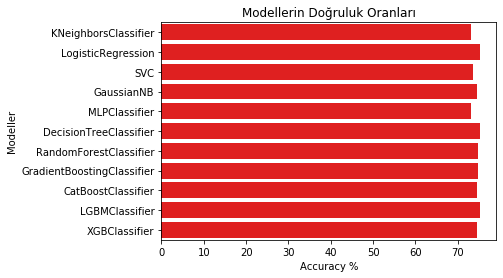

In [170]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    
    if(model == mlpc_tuned):
        
        isimler = model.__class__.__name__
        y_pred = model.predict(X_test_scaled)
        dogruluk = accuracy_score(y_test, y_pred)  
        sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
        sonuclar = sonuclar.append(sonuc)
        
    else:
        
        isimler = model.__class__.__name__
        y_pred = model.predict(X_test)
        dogruluk = accuracy_score(y_test, y_pred)    
        sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
        sonuclar = sonuclar.append(sonuc)
    
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');        